In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [37]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
df = pd.read_csv(r"IT-Stellen_python.csv")
df.head()

,Unnamed: 0,title,text,url
0,0,Senior Python Backend Developer (m/f/d),"As a corporate startup of ÖBB, our mission is ...",https://www.itstellen.at/j/6648446
1,1,Senior Software Engineer (m/w/d) - Java / Pyth...,SENIOR SOFTWARE ENGINEER (m/w/d) - JAVA / PYTH...,https://www.itstellen.at/j/6583628
2,2,Senior Python Backend Developer (m/w/x),Senior Python Backend Developer (m/w/x)\nWien-...,https://www.itstellen.at/j/6646175
3,3,IT-Lösungsentwickler:in mit Schwerpunkt Python...,IT-Lösungsentwickler:in mit Schwerpunkt Python...,https://www.itstellen.at/j/6644804
4,4,Python Developer (m/w/d),Wir bei Anexia übernehmen jeden Tag Verantwort...,https://www.itstellen.at/j/6633890


In [40]:
df.shape

(195, 4)

In [41]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText 

In [42]:
df['cleaned_re'] = df['text'].apply(lambda x:cleanDescription(x))
df.head() 

,Unnamed: 0,title,text,url,cleaned_re
0,0,Senior Python Backend Developer (m/f/d),"As a corporate startup of ÖBB, our mission is ...",https://www.itstellen.at/j/6648446,as a corporate startup of öbb our mission is t...
1,1,Senior Software Engineer (m/w/d) - Java / Pyth...,SENIOR SOFTWARE ENGINEER (m/w/d) - JAVA / PYTH...,https://www.itstellen.at/j/6583628,senior software engineer m w d java python c r...
2,2,Senior Python Backend Developer (m/w/x),Senior Python Backend Developer (m/w/x)\nWien-...,https://www.itstellen.at/j/6646175,senior python backend developer m w x wien wie...
3,3,IT-Lösungsentwickler:in mit Schwerpunkt Python...,IT-Lösungsentwickler:in mit Schwerpunkt Python...,https://www.itstellen.at/j/6644804,it lösungsentwickler in mit schwerpunkt python...
4,4,Python Developer (m/w/d),Wir bei Anexia übernehmen jeden Tag Verantwort...,https://www.itstellen.at/j/6633890,wir bei anexia übernehmen jeden tag verantwort...


In [43]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [44]:
df['cleaned_text'] = df['cleaned_re'].apply(lambda x:text_clean_2(x))
df.head(2)

,Unnamed: 0,title,text,url,cleaned_re,cleaned_text
0,0,Senior Python Backend Developer (m/f/d),"As a corporate startup of ÖBB, our mission is ...",https://www.itstellen.at/j/6648446,as a corporate startup of öbb our mission is t...,corporate startup öbb mission make diversity m...
1,1,Senior Software Engineer (m/w/d) - Java / Pyth...,SENIOR SOFTWARE ENGINEER (m/w/d) - JAVA / PYTH...,https://www.itstellen.at/j/6583628,senior software engineer m w d java python c r...,senior software engineer w java python c refer...


In [47]:
#getting the entire resume text
corpus=" "
for i in range(0,119):
    corpus= corpus+ df["cleaned_text"][i]

In [48]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['abhängig', 'unterstützung', 'möglich', 'mehrjährige', 'unterstützt', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung', '•','berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence1 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence1))

Old length:  288429
New length:  182208


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(sentence1)

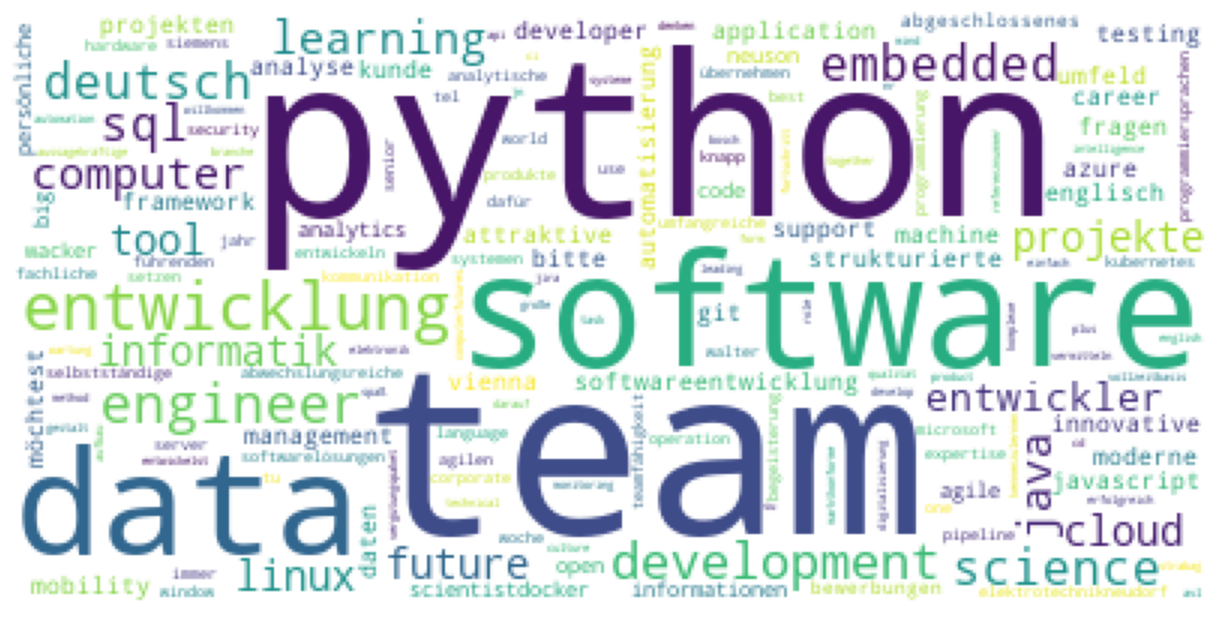

In [50]:
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Running the Banking  File

In [51]:
df_1= pd.read_csv(r"IT-Stellen_Banking.csv")
df_1.head()

,Unnamed: 0,title,text,url
0,0,SAP Key User Finance / Bilanzbuchhalter (m/w/d),SAP Key User Finance / Bilanzbuchhalter (m/w/d...,https://www.itstellen.at/j/6398177
1,1,Product Manager (all genders) for Trade Finance,Working with us means believing in the future;...,https://www.itstellen.at/j/6566810
2,2,(Senior) Consultant Core Banking Platform (m/f/x),(Senior) Consultant Core Banking Platform (m/f...,https://www.itstellen.at/j/5869793
3,3,Business Analyst for IT Delivery Accounting (f...,BUSINESS ANALYST FOR IT DELIVERY ACCOUNTING (F...,https://www.itstellen.at/j/6570467
4,4,(Junior) IT-Consultant Banking (m/w/x),(Junior) IT-Consultant Banking (m/w/x)\nStando...,https://www.itstellen.at/j/6026236


In [52]:
df_1=df_1.drop("url", axis='columns')

In [53]:
df_1=df_1.drop("Unnamed: 0", axis='columns')

In [54]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText

In [55]:
df_1['cleaned_re'] = df_1['text'].apply(lambda x:cleanDescription(x))
df_1.head() 

,title,text,cleaned_re
0,SAP Key User Finance / Bilanzbuchhalter (m/w/d),SAP Key User Finance / Bilanzbuchhalter (m/w/d...,sap key user finance bilanzbuchhalter m w d vo...
1,Product Manager (all genders) for Trade Finance,Working with us means believing in the future;...,working with us means believing in the future ...
2,(Senior) Consultant Core Banking Platform (m/f/x),(Senior) Consultant Core Banking Platform (m/f...,senior consultant core banking platform m f x...
3,Business Analyst for IT Delivery Accounting (f...,BUSINESS ANALYST FOR IT DELIVERY ACCOUNTING (F...,business analyst for it delivery a ounting f m...
4,(Junior) IT-Consultant Banking (m/w/x),(Junior) IT-Consultant Banking (m/w/x)\nStando...,junior it consultant banking m w x standort w...


In [56]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [57]:
df_1['cleaned_text'] = df_1['cleaned_re'].apply(lambda x:text_clean_2(x))
df_1.head(2)

,title,text,cleaned_re,cleaned_text
0,SAP Key User Finance / Bilanzbuchhalter (m/w/d),SAP Key User Finance / Bilanzbuchhalter (m/w/d...,sap key user finance bilanzbuchhalter m w d vo...,sap key user finance bilanzbuchhalter w vollze...
1,Product Manager (all genders) for Trade Finance,Working with us means believing in the future;...,working with us means believing in the future ...,working u mean believing future great people s...


In [58]:
df_1=df_1.drop("cleaned_re", axis='columns')
df_1

,title,text,cleaned_text
0,SAP Key User Finance / Bilanzbuchhalter (m/w/d),SAP Key User Finance / Bilanzbuchhalter (m/w/d...,sap key user finance bilanzbuchhalter w vollze...
1,Product Manager (all genders) for Trade Finance,Working with us means believing in the future;...,working u mean believing future great people s...
2,(Senior) Consultant Core Banking Platform (m/f/x),(Senior) Consultant Core Banking Platform (m/f...,senior consultant core banking platform f x lo...
3,Business Analyst for IT Delivery Accounting (f...,BUSINESS ANALYST FOR IT DELIVERY ACCOUNTING (F...,business analyst delivery ounting f wien raiff...
4,(Junior) IT-Consultant Banking (m/w/x),(Junior) IT-Consultant Banking (m/w/x)\nStando...,junior consultant banking w x standort wien ic...
5,Accounting Specialist (f/m/d),Accounting Specialist (f/m/d)\n1030 Wien\nRaif...,ounting specialist f wien raiffeisen digital b...
6,Manager Digital Support m/w/x,DON´T LIMIT YOUR CHALLENGES - CHALLENGE YOUR L...,don´t limit challenge challenge limit manager ...
7,Data Governance & Security Analyst m/w/x,DON ́T LIMIT YOUR CHALLENGES - CHALLENGE YOUR ...,́t limit challenge challenge limit data govern...
8,Student Job (f/m/x ) - Financial Institutions ...,Studentenjob (f/m/x) - Financial Institutions ...,studentenjob f x financial institution analysi...
9,Internship (f/m/x) - Corporate Customers Digital,Internship (f/m/x) - Corporate Customers Digit...,internship f x corporate customer digital midd...


In [59]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
 
stop_words = stopwords.words('german')
df_1['text_woStopwords'] = df_1['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
df_1=df_1.drop("title", axis='columns')
df_1=df_1.drop("text", axis='columns')
df_1=df_1.drop("cleaned_text", axis='columns')
df_1.head(2)

,text_woStopwords
0,sap key user finance bilanzbuchhalter w vollze...
1,working u mean believing future great people s...


In [61]:
cell_text = print(df_1["text_woStopwords"].values[3])
print(cell_text)

business analyst delivery ounting f wien raiffeisen digital bank released interested financial market place u team professional start culture charge one largest digital innovation project banking group plan build new digital banking end end customer journey roll banking service across multiple cee country looking motivated candidate support finance team vienna business analyst delivery ounting f responsibility act product owner ounting ensure proper setup operation business process preparation booking rule retail product ordance group standard alignment ounting colleague setting agreed ounting rule core banking system subsequent testing transaction uracy respective booking shape finance architecture together business expert collection alignment requirement stakeholder maintenance prioritization product backlog qualification data analysis processing skill ideally experience jira sql sap mambu prior experience banking industry audit area similar ifrs ugb knowledge basic understanding ret

In [62]:
df_1.shape

(17, 1)

In [63]:
#getting the entire resume text
Bank_corpus=" "
for i in range(0,17):
    Bank_corpus= Bank_corpus+ df_1["text_woStopwords"][i]

In [64]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = Bank_corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence2 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence2 ))

Old length:  42085
New length:  33295


In [65]:
def common_words(sentence1, sentence2):
    # split the sentences into lists of words
    words1 = sentence1.split()
    words2 = sentence2.split()
    
    # use set intersection to get the common words
    common = set(words1).intersection(words2)
    
    # convert the set back to a list and return it
    return list(common)

# print(common_words(sentence1, sentence2))
Common_words = common_words(sentence1, sentence2)
Common_words

['inspirierende',
 'organisatorischen',
 'additional',
 'einstieg',
 'framework',
 'besteht',
 'saving',
 'news',
 'budget',
 'stark',
 'expertise',
 'competitive',
 'dokumentationen',
 'proficient',
 'ä',
 'monthly',
 'central',
 '…',
 'risk',
 'multiple',
 'via',
 'datenanalyse',
 'daily',
 'european',
 'feel',
 'austrian',
 'ticket',
 'issue',
 'create',
 'suit',
 'functional',
 'aktive',
 'enhancement',
 'highly',
 'machine',
 'tanja',
 'rabatte',
 'cooperation',
 'tower',
 'translating',
 'management',
 'let',
 'student',
 'skin',
 'raiffeisen',
 'owner',
 'erstellen',
 'beyond',
 'week',
 'minded',
 'safe',
 'projekten',
 'problemen',
 '„',
 'improvement',
 'potential',
 'multi',
 'common',
 'teilzeit',
 'site',
 'numerous',
 'fragen',
 'possibility',
 'prozessen',
 'video',
 'erfolg',
 'transformationsprojekten',
 'applying',
 'today',
 'journey',
 'first',
 'identifikation',
 'demonstrate',
 'anstellung',
 'übernimmst',
 'understanding',
 'lunch',
 'bezüglich',
 'bachelor',
 's

In [66]:
UnwantedWords = ['abhängig', 'unterstützung', 'möglich', 'mehrjährige', 'unterstützt', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung']
sw_nltk.extend(Common_words)
sw_nltk.extend(UnwantedWords)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
NewCleanedText = " ".join(words)

#print(new_text)
print("Old length: ", len(sentence1))
print("New length: ", len(NewCleanedText ))

Old length:  182208
New length:  130221


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(NewCleanedText)

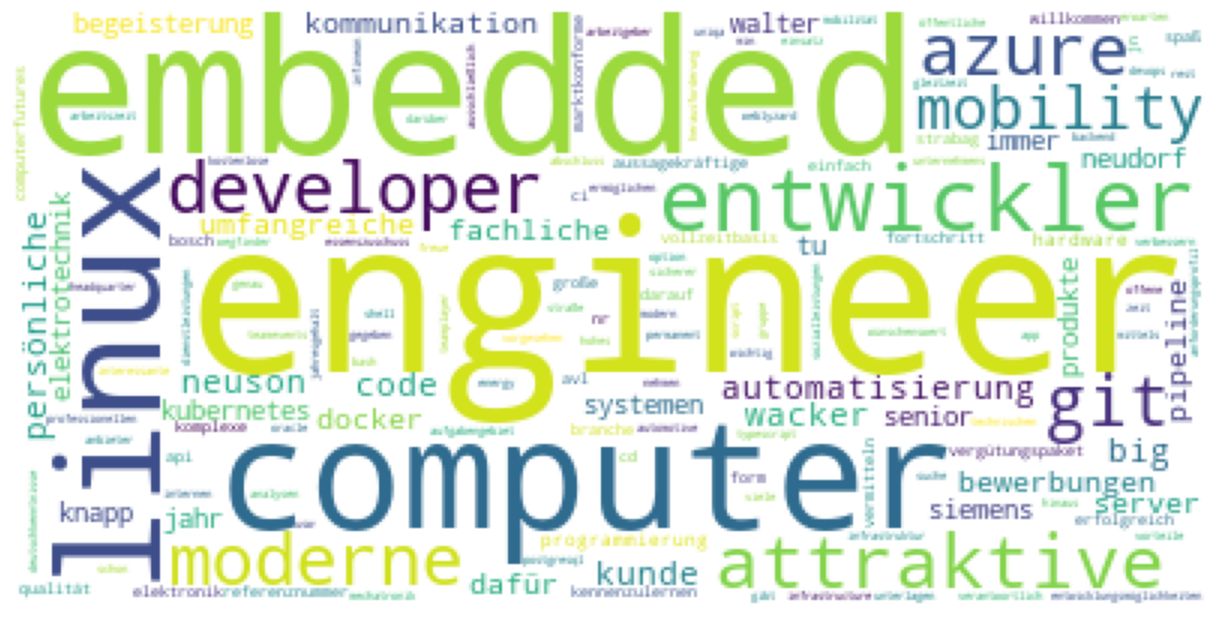

In [68]:
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [69]:
tokenizer = nltk.tokenize.RegexpTokenizer('w+')
#Tokenizing the text
tokens = nltk.word_tokenize(NewCleanedText)
#tokens = tokenizer.tokenize(corpus)
len(NewCleanedText)

130221

In [70]:
freq_dist = nltk.FreqDist(tokens)
mostcommon = freq_dist.most_common(1000)
mostcommon

[('engineer', 68),
 ('embedded', 52),
 ('computer', 46),
 ('linux', 41),
 ('entwickler', 38),
 ('developer', 31),
 ('azure', 30),
 ('git', 27),
 ('mobility', 25),
 ('kunde', 23),
 ('code', 23),
 ('big', 22),
 ('wacker', 22),
 ('neuson', 22),
 ('automatisierung', 22),
 ('docker', 20),
 ('bewerbungen', 20),
 ('pipeline', 20),
 ('server', 19),
 ('fachliche', 19),
 ('dafür', 19),
 ('attraktives', 18),
 ('begeisterung', 18),
 ('systemen', 18),
 ('tu', 18),
 ('knapp', 18),
 ('siemens', 18),
 ('elektrotechnik', 18),
 ('neudorf', 18),
 ('walter', 18),
 ('senior', 17),
 ('kubernetes', 17),
 ('jahr', 17),
 ('immer', 17),
 ('moderne', 17),
 ('produkte', 17),
 ('programmierung', 17),
 ('persönliche', 17),
 ('hardware', 17),
 ('aussagekräftige', 16),
 ('willkommen', 16),
 ('erfolgreich', 16),
 ('spaß', 16),
 ('elektronik', 16),
 ('bosch', 16),
 ('attraktive', 15),
 ('ci', 15),
 ('cd', 15),
 ('branche', 15),
 ('umfangreiche', 15),
 ('vollzeitbasis', 15),
 ('fortschritt', 15),
 ('vermitteln', 15),
 (

### END

In [ ]:
df